This file is meant to be run after "Preprocessing.ipynb", and does additional wordcloud-based cleaning and downsampling when necessary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import gzip
import json
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import re
import os
import sys
import math
import time
import nltk
import torch
import random
import string
import collections

import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec
from nltk.corpus import brown
from sklearn.manifold import TSNE
from torch.autograd import Variable
from torchtext import data, datasets
from torchtext.vocab import Vectors

from IPython.display import Image, YouTubeVideo
from torch.nn import functional as F

from sklearn.model_selection import train_test_split

from madgrad import MADGRAD

from torchtext.legacy import data

import time

In [ ]:
el_train.read_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/electronics_train.csv')
el_test.read_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/electronics_test.csv')

all_train=pd.read_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_train.csv')
all_test= pd.read_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Additional wordcloud-based manual cleaning

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
all_train['nw'] = all_train['reviewText'].apply(lambda x: len(token.tokenize(x)))

In [ ]:
all_test['nw'] = all_test['reviewText'].apply(lambda x: len(token.tokenize(x)))

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def create_wordcloud_text(df, num_review_words):
    df = df[df['nw'] <= num_review_words]
    
    df_positive = df.loc[df['pos_neg'] == 1]
    df_negative = df.loc[df['pos_neg'] == 0]
    df_neutral = df.loc[df['pos_neg'] == 2]

    pos_text = " ".join(review for review in df_positive['reviewText'].astype(str))
    neg_text = " ".join(review for review in df_negative['reviewText'].astype(str))
    neut_text = " ".join(review for review in df_neutral['reviewText'].astype(str))

    return pos_text, neg_text, neut_text
    
stopwords = set(STOPWORDS)


In [ ]:
pos_text, neg_text, neut_text = create_wordcloud_text(et, 1)

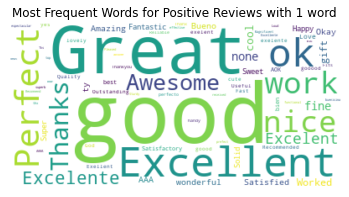

In [ ]:
poswordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(pos_text)
plt.figure()
plt.imshow(poswordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent Words for Positive Reviews with 1 word')
plt.show()

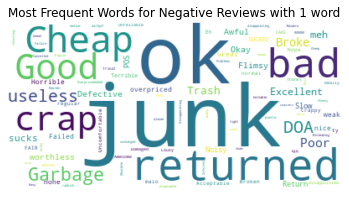

In [ ]:
negwordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(neg_text)
plt.figure()
plt.imshow(negwordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent Words for Negative Reviews with 1 word')
plt.show()

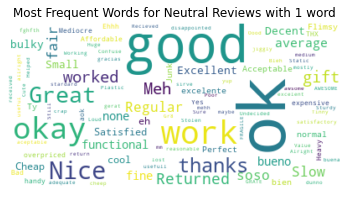

In [ ]:
neutwordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(neut_text)
plt.figure()
plt.imshow(neutwordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent Words for Neutral Reviews with 1 word')
plt.show()

In [ ]:
drop_indices = el_train[(el_train['nw'] == 1) & (el_train['reviewText'].str.contains('good')) & (el_train['pos_neg'] == 0)].index
el_train.drop(drop_indices, inplace=True)
drop_indices = el_train[(el_train['nw'] == 1) & (el_train['reviewText'].str.contains('great')) & (el_train['pos_neg'] == 0)].index
el_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('fine')) & (all_train['pos_neg'] == 0)].index
el_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('fair')) & (all_train['pos_neg'] == 0)].index
el_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('excellent')) & (all_train['pos_neg'] == 0)].index
el_train.drop(drop_indices, inplace=True)


drop_indices = el_test[(el_test['nw'] == 1) & (el_test['reviewText'].str.contains('good')) & (el_test['pos_neg'] == 0)].index
el_test.drop(drop_indices, inplace=True)
drop_indices = el_test[(el_test['nw'] == 1) & (el_test['reviewText'].str.contains('great')) & (el_test['pos_neg'] == 0)].index
el_test.drop(drop_indices, inplace=True)
drop_indices = el_test[(el_test['nw'] == 1) & (el_test['reviewText'].str.contains('fine')) & (el_test['pos_neg'] == 0)].index
el_test.drop(drop_indices, inplace=True)
drop_indices = el_test[(el_test['nw'] == 1) & (el_test['reviewText'].str.contains('fair')) & (el_test['pos_neg'] == 0)].index
el_test.drop(drop_indices, inplace=True)
drop_indices = el_test[(el_test['nw'] == 1) & (el_test['reviewText'].str.contains('excellent')) & (el_test['pos_neg'] == 0)].index
el_test.drop(drop_indices, inplace=True)




In [ ]:
pos_text, neg_text, neut_text = create_wordcloud_text(all_train, 1)

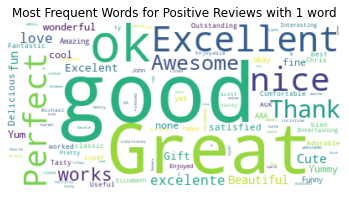

In [ ]:
poswordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(pos_text)
plt.figure()
plt.imshow(poswordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent Words for Positive Reviews with 1 word')
plt.show()

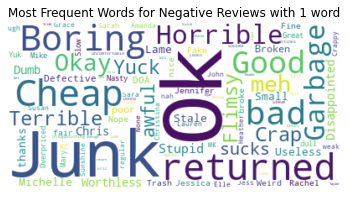

In [ ]:
negwordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(neg_text)
plt.figure()
plt.imshow(negwordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent Words for Negative Reviews with 1 word')
plt.show()

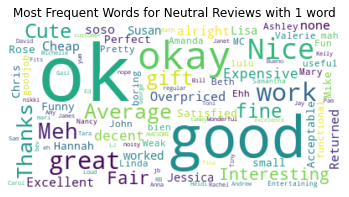

In [ ]:
neutwordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(neut_text)
plt.figure()
plt.imshow(neutwordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent Words for Neutral Reviews with 1 word')
plt.show()

In [ ]:

drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('good')) & (all_train['pos_neg'] == 0)].index
all_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('great')) & (all_train['pos_neg'] == 0)].index
all_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('great')) & (all_train['pos_neg'] == 2)].index
all_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('fine')) & (all_train['pos_neg'] == 0)].index
all_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('fair')) & (all_train['pos_neg'] == 0)].index
all_train.drop(drop_indices, inplace=True)
drop_indices = all_train[(all_train['nw'] == 1) & (all_train['reviewText'].str.contains('excellent')) & (all_train['pos_neg'] == 0)].index
all_train.drop(drop_indices, inplace=True)

drop_indices = all_test[(all_test['nw'] == 1) & (all_test['reviewText'].str.contains('good')) & (all_test['pos_neg'] == 0)].index
all_test.drop(drop_indices, inplace=True)
drop_indices = all_test[(all_test['nw'] == 1) & (all_test['reviewText'].str.contains('great')) & (all_test['pos_neg'] == 0)].index
all_test.drop(drop_indices, inplace=True)
drop_indices = all_test[(all_test['nw'] == 1) & (all_test['reviewText'].str.contains('great')) & (all_test['pos_neg'] == 2)].index
all_test.drop(drop_indices, inplace=True)
drop_indices = all_test[(all_test['nw'] == 1) & (all_test['reviewText'].str.contains('fine')) & (all_test['pos_neg'] == 0)].index
all_test.drop(drop_indices, inplace=True)
drop_indices = all_test[(all_test['nw'] == 1) & (all_test['reviewText'].str.contains('fair')) & (all_test['pos_neg'] == 0)].index
all_test.drop(drop_indices, inplace=True)
drop_indices = all_test[(all_test['nw'] == 1) & (all_test['reviewText'].str.contains('excellent')) & (all_test['pos_neg'] == 0)].index
all_test.drop(drop_indices, inplace=True)

In [ ]:
el_train.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/electronics_train.csv')
el_test.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/electronics_test.csv')

all_train.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_train.csv')
all_test.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_test.csv')

Create Binary Schemes

In [ ]:
el_bin = el_train[el_train['pos_neg'] < 2]

In [ ]:
el_bin_test = el_test[el_test['pos_neg'] < 2]

In [ ]:
all_bin = all_train[all_train['pos_neg'] < 2]

In [ ]:
all_bin_test = all_test[all_test['pos_neg'] < 2]

In [ ]:
all_neut = all_train[all_train['neutrality'] < 2]

In [ ]:
all_neut_test = all_test[all_test['neutrality'] < 2]

Downsample neutrals

In [ ]:
!pip install imblearn

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rating_counts = all_neut['overall'].value_counts()
rating_counts['sample_target'] = rating_counts.apply(lambda x: 25000 if x != 49992 else x)
    
under = RandomUnderSampler(sampling_strategy= {1: rating_counts['sample_target'][1], 3:rating_counts['sample_target'][3], 5: rating_counts['sample_target'][5]} )
x = all_neut.drop(['overall'], axis=1)
y = all_neut['overall']

x_under, y_under = under.fit_resample(x, y)
print(Counter(y_under))



Counter({3.0: 49992, 1.0: 25000, 5.0: 25000})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
neut = x_under.join(y_under)

In [ ]:
neut = pd.DataFrame(x_under, columns=x.columns)
neut['neutrality'].value_counts()

Create subsamples

In [ ]:
sample_size = 20000
neut_small = neut.groupby('neutrality', group_keys=False).apply(lambda x: x.sample(int(np.rint(sample_size*len(x)/len(neut))))).sample(frac=1).reset_index(drop=True)

sample_size = 5000
neut_small_test = all_neut_test.groupby('neutrality', group_keys=False).apply(lambda x: x.sample(int(np.rint(sample_size*len(x)/len(all_neut_test))))).sample(frac=1).reset_index(drop=True)

In [ ]:
neut.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_neutrality_binary.csv')
all_neut_test.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_neutrality_binary_test.csv')
neut_small.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_neutrality_binary_small.csv')
neut_small_test.to_csv('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_neutrality_binary_test_small.csv')

In [ ]:
sample_size = 20000
all_small = all_train.groupby('overall', group_keys=False).apply(lambda x: x.sample(int(np.rint(sample_size*len(x)/len(all_train))))).sample(frac=1).reset_index(drop=True)

sample_size = 5000
all_small_test = all_test.groupby('overall', group_keys=False).apply(lambda x: x.sample(int(np.rint(sample_size*len(x)/len(all_test))))).sample(frac=1).reset_index(drop=True)

Save to JSONS

In [ ]:

train_json = el_bin.to_json(orient = 'records')
train_json_result = json.loads(train_json)
with open('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/electronics_train_binaryposneg.json', 'w') as f:
    for entry in train_json_result:
        json.dump(entry, f)
        f.write('\n')

test_json = el_bin_test.to_json(orient = 'records')
test_json_result = json.loads(test_json)
with open('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/electronics_test_binaryposneg.json', 'w') as f:
    for entry in test_json_result:
        json.dump(entry, f)
        f.write('\n')

In [ ]:

train_json = all_train.to_json(orient = 'records')
train_json_result = json.loads(train_json)
with open('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_train_5class.json', 'w') as f:
    for entry in train_json_result:
        json.dump(entry, f)
        f.write('\n')

test_json = all_test.to_json(orient = 'records')
test_json_result = json.loads(test_json)
with open('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/all_test_5class.json', 'w') as f:
    for entry in test_json_result:
        json.dump(entry, f)
        f.write('\n')

In [ ]:
train_json = neut.to_json(orient = 'records')
train_json_result = json.loads(train_json)
with open('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/neutrality_binary_train.json', 'w') as f:
    for entry in train_json_result:
        json.dump(entry, f)
        f.write('\n')

test_json = all_neut_test.to_json(orient = 'records')
test_json_result = json.loads(test_json)
with open('/content/drive/Shareddrives/519 Project/Data/preprocessed/Final Data/neutrality_binary_test.json', 'w') as f:
    for entry in test_json_result:
        json.dump(entry, f)
        f.write('\n')